In [68]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import sqrt

def onsager(z, r, tau):
    return (z/n) * np.sum(eta(r, tau) != 0)

def eta(u, T):
    return (u - T)*(u >= T) + (u + T)*(u <= -T)

In [69]:
n = 270
N = 1024
k = 40
num_iterations = 5
s = 0.2
lambda_ = 0.1

# create sensing matrix A
A = np.sqrt(1/n)*np.random.randn(n, N)
#fade_A = A @ h

# corresponds to SNRs of 1, 5, 10, 20, 30
sigma = [0.8912509381337455, 0.5623413251903491, 0.31622776601683794, 0.1, 0.03162277660168379]
#sigma[2] = .12
w = sigma[2]*np.random.randn(n).reshape(-1,1)

# create k sparse x vector
x = np.zeros((N, 1))
idx_nonzero_entries = np.random.permutation(N)[0:k]
x[idx_nonzero_entries] = 1

y = A @ x + w

mse_vs_iterations = np.zeros(num_iterations)

In [70]:
h = np.zeros(shape=(N,N))
# creating fading coefficients
# creates NxN array where rows are filled with the same h value
for i in range(N):
    tmp = (random.normalvariate(0, sqrt(.5)) + 1j*random.normalvariate(0, sqrt(.5)))
    for j in range(N):
        h[i][j] = abs(tmp) # for now we only care about real part
#print(h.T)
# h.T makes it so all columns have the same h
#print(h[i])

In [71]:
# Prep for IST/AMP
z = np.zeros(y.shape)
xHt = np.zeros(x.shape)
r = 0
tau = 0
ons = 0

#AMP
for idx_iter in range(num_iterations):
    ons = onsager(z, r, tau)
    z = y - A @ xHt + ons
    tau = np.sqrt(1/n) * np.linalg.norm(z)
    r = xHt + A.T @ z
    xHt = eta(r, tau)

    # find the current error
    mse_vs_iterations[idx_iter] = (1/N) * np.sum((x - xHt)**2)

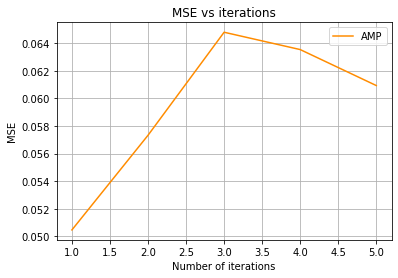

n = 270 | N = 1024 | k = 40


In [72]:
plt.figure()
plt.plot(range(1,num_iterations+1), mse_vs_iterations, label="AMP", color="darkorange")
plt.title("MSE vs iterations")
plt.xlabel("Number of iterations")
plt.ylabel("MSE")
plt.legend()
plt.grid(True, which='both')
plt.show()
print(f'n = {n} | N = {N} | k = {k}')

In [66]:
mse_vs_iter = np.zeros(num_iterations)
xHt = np.zeros(x.shape)

for idx_iter in range(num_iterations):
    z = y - A @ xHt
    r = xHt + s * A.T @ z
    xHt = eta(r, s*lambda_)
    # find the current error
    mse_vs_iter[idx_iter] = (1/N) * np.sum((x - xHt)**2)
    

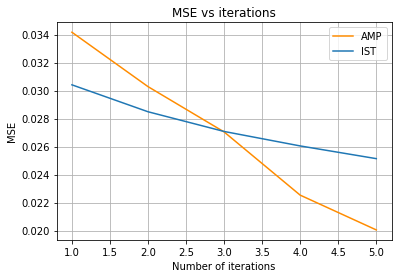

n = 270 | N = 1024 | k = 40
SNR = 30dB


In [67]:

plt.figure()
plt.plot(range(1,num_iterations+1), mse_vs_iterations, label="AMP", color="darkorange")
plt.plot(range(1,num_iterations+1), mse_vs_iter, label="IST")
plt.title("MSE vs iterations")
plt.xlabel("Number of iterations")
plt.ylabel("MSE")
plt.legend()
plt.grid(True, which='both')
plt.show()
print(f'n = {n} | N = {N} | k = {k}')
print('SNR = 30dB')

In [35]:
print(mse_vs_iterations[18:31])
print(mse_vs_iter[18:31])

[0.00195767 0.00159425 0.00138909 0.00118674 0.00102286 0.00088765
 0.00076362 0.00061861 0.00056936 0.00047878 0.000384   0.00035252
 0.00030288]
[0.01622974 0.01581139 0.0154079  0.01501831 0.01464147 0.01427665
 0.01392295 0.01357974 0.01324662 0.01292308 0.01260875 0.01230317
 0.01200537]


In [18]:
#lista10 = [0.02735818363726139, 0.028723379597067833, 0.030329732224345207, 0.030796675011515617, 0.03051833063364029]
# init_alpha = 0.75
lista10 = [0.027224335819482803, 0.02705369144678116, 0.02703084982931614, 0.027027612552046776, 0.02704850770533085]
lista20 = [0.017235206440091133, 0.012382063083350658, 0.010942485183477402, 0.010209700092673302, 0.009579195640981197]
lista30 = [0.0155345369130373, 0.009263429790735245, 0.0066907210275530815, 0.005058402195572853, 0.00397052988409996]
noiseless_lista = [.015, .0094, .006,.0047, .003]

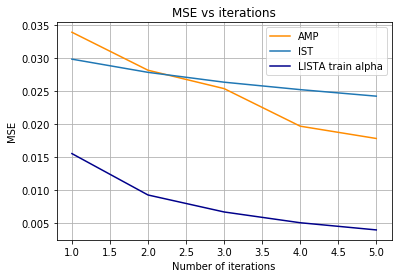

n = 270 | N = 1024 | k = 40
SNR = 30dB


In [81]:
# comparing all three algorithms

plt.figure()
plt.plot(range(1,num_iterations+1), mse_vs_iterations, label="AMP", color="darkorange")
plt.plot(range(1,num_iterations+1), mse_vs_iter, label="IST")
#plt.plot(range(1, num_iterations+1), lista30, label="LISTA train alpha", color="darkblue")
plt.title("MSE vs iterations")
plt.xlabel("Number of iterations")
plt.ylabel("MSE")
plt.legend()
plt.grid(True, which='both')
plt.show()
print(f'n = {n} | N = {N} | k = {k}')
print('SNR = 30dB')

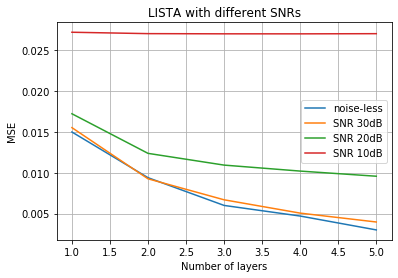

In [19]:
# comparing lista at different noises
plt.figure()
plt.title("LISTA with different SNRs")
plt.ylabel("MSE")
plt.xlabel("Number of layers")
plt.plot(range(1, 5+1), noiseless_lista, label="noise-less")
plt.plot(range(1, 5+1), lista30, label="SNR 30dB")
plt.plot(range(1, 5+1), lista20, label="SNR 20dB")
plt.plot(range(1, 5+1), lista10, label="SNR 10dB")
plt.legend()
plt.grid(True, which='both')
plt.show()

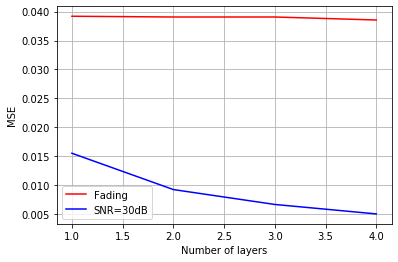

In [118]:
fading_lista = [0.03919283673167229, 0.0390625, 0.03906309977173805, 0.038543883711099625, 26423.841796875]

plt.figure()
plt.plot(range(1,5), fading_lista[:-1], label="Fading", color='red')
plt.plot(range(1,5), lista30[:-1] ,label="SNR=30dB", color='blue')
plt.ylabel("MSE")
plt.xlabel("Number of layers")
plt.legend()
plt.grid(True, which='both')
plt.show()

# Below values are for when only alpha was trained

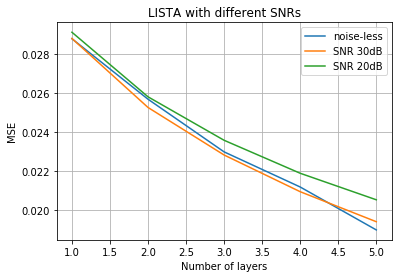

In [64]:
noiseless_lista = [.0288, .0257, .023, .0212, .019]

plt.figure()
plt.title("LISTA with different SNRs")
plt.ylabel("MSE")
plt.xlabel("Number of layers")
plt.plot(range(1, 5+1), noiseless_lista, label="noise-less")
plt.plot(range(1, 5+1), lista30, label="SNR 30dB")
plt.plot(range(1, 5+1), lista20, label="SNR 20dB")
#plt.plot(range(1, 5+1), lista10, label="SNR 10dB")
plt.legend()
plt.grid(True, which='both')
plt.show()

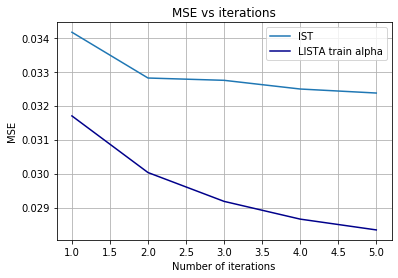

n = 270 | N = 1024 | k = 40
SNR = 10dB


In [60]:
# 30dB
lista30 = [0.028813188895583153, 0.02527638152241707, 0.022840021178126335, 0.020958876237273216, 0.019420886412262917]

#20dB
lista20 = [0.02913258969783783, 0.025823263451457024, 0.023594414815306664, 0.021904321387410164, 0.02054455131292343]

#10db
lista10 = [0.03169730305671692, 0.03002990037202835, 0.029181115329265594, 0.028658872470259666, 0.028340915217995644]

plt.figure()
#plt.plot(range(1,num_iterations+1), mse_vs_iterations, label="AMP", color="darkorange")
plt.plot(range(1,num_iterations+1), mse_vs_iter, label="IST")
plt.plot(range(1, num_iterations+1), lista10, label="LISTA train alpha", color="darkblue")
plt.title("MSE vs iterations")
plt.xlabel("Number of iterations")
plt.ylabel("MSE")
plt.legend()
plt.grid(True, which='both')
plt.show()
print(f'n = {n} | N = {N} | k = {k}')
print('SNR = 10dB')

In [127]:
A = np.array([[2, 5, 11, 17, 23], [3, 7, 13, 19, 29]])
b = np.array([228, 227])
I = 500
# X, err = kaczmarz(A, b, I)

# plt.figure(figsize=(8, 6))
# plt.semilogy(np.arange(1, I + 1), err)

In [138]:
m = A.shape[0]
n = A.shape[1]

v = np.zeros(n) # size n x 1 
X = [] # will append v to this each time
err = []

for i in range(I):
    for j in range(1,m):
        si = (j % m) + 1
        ai = A[si, :]
        v_next = v + ((b[si] - ai*v) / np.linalg.norm(ai)**2) * ai
        err.append(np.linalg.norm((A@v_next - b), np.inf))
        X.append(v_next)
        v = v_next

IndexError: index 2 is out of bounds for axis 0 with size 2

In [137]:
print(err[0:6])

[41.5073477956613, 130.43856220320754, 214.63200347960435, 274.6952932532579, 320.8075987348469, 357.9861041185686]
